# Google My Business Locations Insights for Element Coffee

#### Retrieve Location Metrics in Google My Business

## Executive Summary

The Google My Business API provides you with several location insights and metrics.

For each location, the following metrics are available for you to analyse:

- The frequency that the resource was shown when the location is searched for directly.
- The frequency that the resource was shown as a result of a categorical search, such as for a restaurant.
- How many times that the resource was viewed on Google Search.
- How many times that the local post was viewed on Google Search.
- How many times that the resource was viewed on Google Maps.
- How many times that the website was clicked.
- How many times that the phone number was clicked.
- How many times that the driving directions were requested.
- How many times that the call-to-action button was clicked.
- The amount of views of photos uploaded by the merchant.
- The total number of photos that are currently live that were uploaded by the merchant.

In [39]:
import os.path
import requests
import time
import json
import glob

import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtain Insights from Google 02Auth Playground

In [2]:
# Cell missing data intentionally
headers = {'Content-Length': '390', 'Content-Type': 'application/json', 'Authorization': '',
          }
accountId = 
locationId = 
URI = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations:reportInsights'
# body of the POST request
data = {
  "locationNames": [
    f"accounts/{accountId}/locations/{locationId}"
  ],
  "basicRequest": {
          "metricRequests": [
             {
               "metric": "ALL"
             },
   
          ],
          "timeRange": {
               "startTime": "2019-04-22T01:01:23.045123456Z",
               "endTime": "2020-10-20T23:59:59.045123456Z"
          }
    }
}
# Jsonify the data object
data = json.dumps(data)

SyntaxError: invalid syntax (<ipython-input-2-ecb0c41e2f26>, line 4)

In [ ]:
r = requests.post(URI, headers=headers, data=data)
print(f'status code: {r.status_code}')
result = r.json()
result

### Save data to JSON file

In [57]:
with open('C:/Users/kamik/code/projects/element_coffee/review_analysis/insights_data.json', 'w') as outfile:
    json.dump(result, outfile)

## Load data into DataFrame from JSON file

In [2]:
with open('insights_data.json') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(json_normalize(data['locationMetrics'][0]['metricValues']), orient='columns')
df['metric'][13] = 'LOCAL_POST_ACTIONS_CALL_TO_ACTION'
df

,metric,totalValue.metricOption,totalValue.timeDimension.timeRange.startTime,totalValue.timeDimension.timeRange.endTime,totalValue.value
0,QUERIES_DIRECT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,18853
1,QUERIES_INDIRECT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,59843
2,QUERIES_CHAIN,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,1109
3,VIEWS_MAPS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,103922
4,VIEWS_SEARCH,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,16680
5,ACTIONS_WEBSITE,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,1050
6,ACTIONS_PHONE,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,0
7,ACTIONS_DRIVING_DIRECTIONS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,659
8,PHOTOS_VIEWS_MERCHANT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,79389
9,PHOTOS_VIEWS_CUSTOMERS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,102945


In [3]:
df.shape

(14, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
metric                                          14 non-null object
totalValue.metricOption                         14 non-null object
totalValue.timeDimension.timeRange.startTime    14 non-null object
totalValue.timeDimension.timeRange.endTime      14 non-null object
totalValue.value                                14 non-null object
dtypes: object(5)
memory usage: 688.0+ bytes


## Legend for Metric Types:
- QUERIES_DIRECT:	The number of times the resource was shown when searching for the location directly.
- QUERIES_INDIRECT:	The number of times the resource was shown as a result of a categorical search (for example, restaurant).
- QUERIES_CHAIN:	The number of times a resource was shown as a result of a search for the chain it belongs to, or a brand it sells. For example, Starbucks, Adidas. This is a subset of QUERIES_INDIRECT.
- VIEWS_MAPS:	The number of times the resource was viewed on Google Maps.
- VIEWS_SEARCH:	The number of times the resource was viewed on Google Search.
- ACTIONS_WEBSITE:	The number of times the website was clicked.
- ACTIONS_PHONE:	The number of times the phone number was clicked.
- ACTIONS_DRIVING_DIRECTIONS:	The number of times driving directions were requested.
- PHOTOS_VIEWS_MERCHANT:	The number of views on media items uploaded by the merchant.
- PHOTOS_VIEWS_CUSTOMERS:	The number of views on media items uploaded by customers.
- PHOTOS_COUNT_MERCHANT:	The total number of media items that are currently live that have been uploaded by the merchant.
- PHOTOS_COUNT_CUSTOMERS:	The total number of media items that are currently live that have been uploaded by customers.
- LOCAL_POST_VIEWS_SEARCH:	The number of times the local post was viewed on Google Search.
- LOCAL_POST_ACTIONS_CALL_TO_ACTION:	The number of times the call to action button was clicked on Google.

## Data Cleansing

In [5]:
def data_cleaning(df):
    df.rename(columns={'totalValue.value':'Aggregated_Totals'}, inplace=True)
    # Change Aggregated_Totals values from objects to Integers
    df['Aggregated_Totals'] = df['Aggregated_Totals'].apply(lambda x: int(x))
    
    df.drop(columns=['totalValue.metricOption', 'totalValue.timeDimension.timeRange.startTime', 'totalValue.timeDimension.timeRange.endTime'], inplace=True)
    df = df.T.squeeze()
    df.columns = df.loc['metric'].values
    df.drop(['metric'], inplace=True)
    df = df.T
    return df

In [6]:
data_cleaning(df)

,Aggregated_Totals
QUERIES_DIRECT,18853
QUERIES_INDIRECT,59843
QUERIES_CHAIN,1109
VIEWS_MAPS,103922
VIEWS_SEARCH,16680
ACTIONS_WEBSITE,1050
ACTIONS_PHONE,0
ACTIONS_DRIVING_DIRECTIONS,659
PHOTOS_VIEWS_MERCHANT,79389
PHOTOS_VIEWS_CUSTOMERS,102945


## Exploratory Data Analysis

Text(0.5, 1.0, 'All Insights Over the last 540 days')

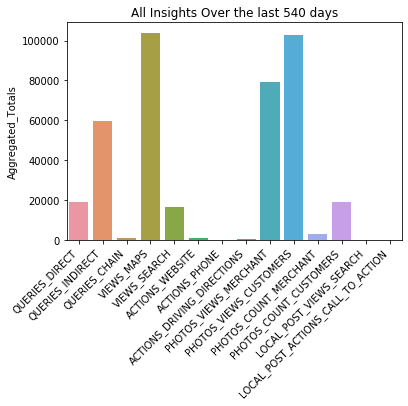

In [143]:
# All insights plot
ax = sns.barplot(df.index[:], df.Aggregated_Totals[:], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('All Insights Over the last 540 days')

In [146]:
ax.figure.savefig('All Insights Over the last 540 days.png', bbox_inches='tight')

In [142]:
# fig = ax.get_figure()
# fig.savefig("all_insights_last_540_days.png")

Text(0.5, 1.0, 'Direct Queries VS Indirect Queries')

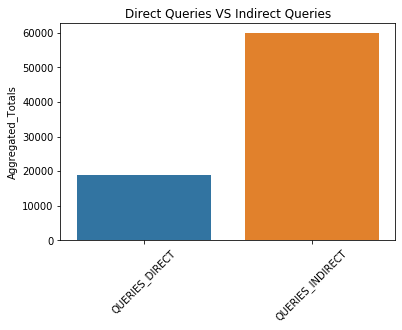

In [128]:
ax = sns.barplot(df.index[0:2], df.Aggregated_Totals[0:2], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Direct Queries VS Indirect Queries')

Text(0.5, 1.0, 'Views on Google VS Views on Google Maps')

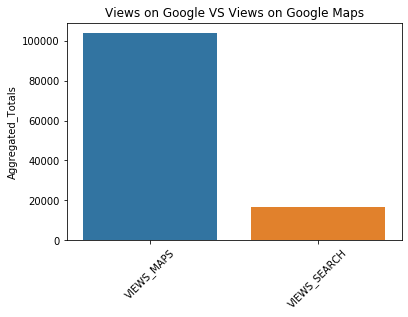

In [129]:
ax = sns.barplot(df.index[3:5], df.Aggregated_Totals[3:5], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Views on Google VS Views on Google Maps')

Text(0.5, 1.0, 'Number of times searched VS Clicked on Google')

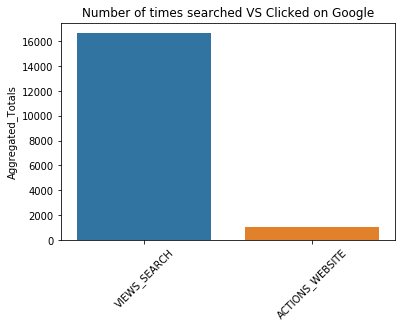

In [127]:
ax = sns.barplot(df.index[4:6], df.Aggregated_Totals[4:6], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of times searched VS Clicked on Google')

In [45]:
# proportion of website cliked to viewed on google:
print(f'The website has been viewed {df.iloc[4]["Aggregated_Totals"]} times and clicked {df.iloc[5]["Aggregated_Totals"]} times.') 
print(f'This is {round((df.iloc[5]["Aggregated_Totals"]/df.iloc[4]["Aggregated_Totals"])*100, 2)}% of the time it is viewed.')

The website has been viewed 16680 times and clicked 1050 times.
This is 6.29% of the time it is viewed.


In [52]:
# How many days in this time period?
startd = '2019-04-22T01:01:23.045123456Z'
endd = '2020-10-20T23:59:59.045123456Z'

startd = pd.to_datetime(startd)
endd = pd.to_datetime(endd)

In [66]:
n_days = endd - startd

In [71]:
n_days.days

547

In [76]:
# the Clicks per day by average
print(f'This locations time period has been active for just over {n_days.days} days. So by average the website has been clicked {round(df.iloc[5]["Aggregated_Totals"]/n_days.days, 2)} times per day.')

This locations time period has been active for just over 547 days. So by average the website has been clicked 1.92 times per day.


Text(0.5, 1.0, 'Photos made and viewed by Merchant and Customer')

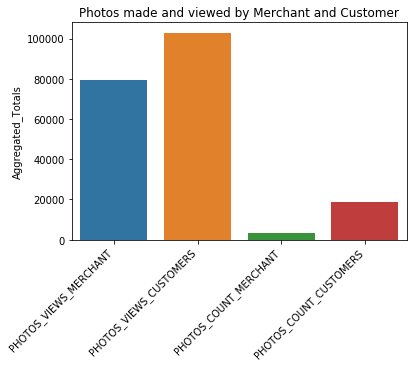

In [147]:
# Photos

ax = sns.barplot(df.index[8:12], df.Aggregated_Totals[8:12], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Photos made and viewed by Merchant and Customer')


## Time Series Analysis for past 18 months

Obtain location insight data for each month and week between two dates for 18 month period: 

In [47]:
#create preprocessing function that supplies post request method below with dict of dates:
def preprocessing(startdt, enddt, freq='week'):
""" 
    Keyword arguments:
    startdt -- start date time to capture the data from takes the form: '2019-04-22T01:01:23.045123456Z' 
    enddt -- end date time to stop capturing the data takes the same form as startdt
    freq -- frequency of time to capture between two dates e.g. month or week"""
    startd = pd.to_datetime(startdt)
    endd = pd.to_datetime(enddt)

    f'{freq}'_frequency = pd.date_range(startd, endd, freq=freq)

    #dict storing week starts and ends for each week in the time period
    f'{freq}'_dict = {str({freq}_frequency[i])[:-6]+'Z':str({freq}_frequency[i+1]-pd.offsets.Minute(1))[:-6]+'Z' for i in range(0,77,1)}
    # Time period and number of weeks in time period:
    print(f'Time Period: {str(startd)[0:11]} to {str(endd)[0:11]}\nNumber of weeks in time period: {len({freq}_frequency)}')
    #inspect week_dict
    f'{freq}'_dict = {k.replace(' ','T'): v.replace(' ','T') for k,v in {freq}_dict.items()}
    return f'{freq}'_dict

Time Period: 2019-05-25  to 2020-11-23 
Number of weeks in time period: 79


In [51]:
# recursive POST request for each week or month between two dates:
# Cell missing data intentionally

def time_series_recursive(dict_time_freq=week_dict):
    '''Post request that iterates through dict of dates with weekly or monthly frequency, obtaining all location insights
        Keyword arguments:
        dict_time_freq -- points to a dict with specific frequency of dates can be week_dict or month_dict (default week_dict)
    '''
    for i, (k, v) in enumerate(dict_time_freq.items()):

        headers = {'Content-Length': '390', 'Content-Type': 'application/json', 'Authorization': '',
                  }
        accountId = 
        locationId = 
        URI = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations:reportInsights'
        # body of the POST request
        data = {
          "locationNames": [
            f"accounts/{accountId}/locations/{locationId}"
          ],
          "basicRequest": {
                  "metricRequests": [
                     {
                       "metric": "ALL"
                     },

                  ],
                  "timeRange": {
                       "startTime": f"{k}",
                       "endTime": f'{v}'
                  }
            }
        }
        # Jsonify the data object
        data = json.dumps(data)
        print(k)
        print(v)
        
        r = requests.post(URI, headers=headers, data=data)
        print(f'status code for week{i}: {r.status_code}')
        result = r.json()
        time.sleep(2)

        #Save file to json
        with open(f'C:/Users/kamik/code/projects/element_coffee/locations_insights/weekly/insights_data_week{i}.json', 'w') as outfile:
            json.dump(result, outfile)

## Obtain Weekly Frequency location insights for past 18 months

In [ ]:
# Dict of start and end dates for each week in the time period
# Time period: May 26 2019 to November 23 2020 
week_dict = preprocessing('2019-05-25T01:01:23.045123456Z', '2020-11-23T23:59:59.045123456Z')

In [53]:
time_series_recursive(dict_time_freq=week_dict)

2019-05-26T01:01:23.045123456Z
2019-06-02T01:00:23.045123456Z
status code for week0: 200
2019-06-02T01:01:23.045123456Z
2019-06-09T01:00:23.045123456Z
status code for week1: 200
2019-06-09T01:01:23.045123456Z
2019-06-16T01:00:23.045123456Z
status code for week2: 200
2019-06-16T01:01:23.045123456Z
2019-06-23T01:00:23.045123456Z
status code for week3: 200
2019-06-23T01:01:23.045123456Z
2019-06-30T01:00:23.045123456Z
status code for week4: 200
2019-06-30T01:01:23.045123456Z
2019-07-07T01:00:23.045123456Z
status code for week5: 200
2019-07-07T01:01:23.045123456Z
2019-07-14T01:00:23.045123456Z
status code for week6: 200
2019-07-14T01:01:23.045123456Z
2019-07-21T01:00:23.045123456Z
status code for week7: 200
2019-07-21T01:01:23.045123456Z
2019-07-28T01:00:23.045123456Z
status code for week8: 200
2019-07-28T01:01:23.045123456Z
2019-08-04T01:00:23.045123456Z
status code for week9: 200
2019-08-04T01:01:23.045123456Z
2019-08-11T01:00:23.045123456Z
status code for week10: 200
2019-08-11T01:01:23.

## Obtain Monthly Frequency location insights for past 18 months

In [ ]:
# Dict of start and end dates for each Month in the time period
# Time period: May 26 2019 to November 23 2020 
month_dict = preprocessing('2019-05-25T01:01:23.045123456Z', '2020-11-23T23:59:59.045123456Z', freq='month')

In [64]:
time_series_recursive(dict_time_freq=month_dict)

2019-05-31T01:01:23.045123456Z
2019-06-30T01:00:23.045123456Z
status code for week0: 200
2019-06-30T01:01:23.045123456Z
2019-07-31T01:00:23.045123456Z
status code for week1: 200
2019-07-31T01:01:23.045123456Z
2019-08-31T01:00:23.045123456Z
status code for week2: 200
2019-08-31T01:01:23.045123456Z
2019-09-30T01:00:23.045123456Z
status code for week3: 200
2019-09-30T01:01:23.045123456Z
2019-10-31T01:00:23.045123456Z
status code for week4: 200
2019-10-31T01:01:23.045123456Z
2019-11-30T01:00:23.045123456Z
status code for week5: 200
2019-11-30T01:01:23.045123456Z
2019-12-31T01:00:23.045123456Z
status code for week6: 200
2019-12-31T01:01:23.045123456Z
2020-01-31T01:00:23.045123456Z
status code for week7: 200
2020-01-31T01:01:23.045123456Z
2020-02-29T01:00:23.045123456Z
status code for week8: 200
2020-02-29T01:01:23.045123456Z
2020-03-31T01:00:23.045123456Z
status code for week9: 200
2020-03-31T01:01:23.045123456Z
2020-04-30T01:00:23.045123456Z
status code for week10: 200
2020-04-30T01:01:23.

## Load time series data into dataframe

In [5]:
# weekly
def load_json_files_to_df(freq='weekly'):
    path_to_json = f'C:/Users/kamik/code/projects/element_coffee/locations_insights/{freq}'
    json_pattern = os.path.abspath(os.path.join(path_to_json,'*.json'))
    file_list = glob.glob(json_pattern)
    dfs = []
    for file in file_list:
        with open(file) as json_file:
             data = json.load(json_file)

        #open file first normalize it then with dict
        temp = pd.DataFrame.from_dict(json_normalize(data['locationMetrics'][0]['metricValues']), orient='columns')
        temp['metric'][13] = 'LOCAL_POST_ACTIONS_CALL_TO_ACTION'
        dfs.append(temp)
    df = pd.concat(dfs, ignore_index=True)
    return df

In [6]:
# weekly
df_weeks = load_json_files_to_df(freq='weekly')

In [7]:
df_weeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
metric                                          1078 non-null object
totalValue.metricOption                         1078 non-null object
totalValue.timeDimension.timeRange.startTime    1078 non-null object
totalValue.timeDimension.timeRange.endTime      1078 non-null object
totalValue.value                                1078 non-null object
dtypes: object(5)
memory usage: 42.2+ KB


In [8]:
# Monthly 
df_months = load_json_files_to_df(freq='monthly')

In [9]:
df_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
metric                                          238 non-null object
totalValue.metricOption                         238 non-null object
totalValue.timeDimension.timeRange.startTime    238 non-null object
totalValue.timeDimension.timeRange.endTime      238 non-null object
totalValue.value                                238 non-null object
dtypes: object(5)
memory usage: 9.4+ KB


## Data cleaning

In [10]:
df_weeks

,metric,totalValue.metricOption,totalValue.timeDimension.timeRange.startTime,totalValue.timeDimension.timeRange.endTime,totalValue.value
0,QUERIES_DIRECT,AGGREGATED_TOTAL,2019-05-26T01:01:23.045123456Z,2019-06-02T01:00:23.045123456Z,231
1,QUERIES_INDIRECT,AGGREGATED_TOTAL,2019-05-26T01:01:23.045123456Z,2019-06-02T01:00:23.045123456Z,284
2,QUERIES_CHAIN,AGGREGATED_TOTAL,2019-05-26T01:01:23.045123456Z,2019-06-02T01:00:23.045123456Z,0
3,VIEWS_MAPS,AGGREGATED_TOTAL,2019-05-26T01:01:23.045123456Z,2019-06-02T01:00:23.045123456Z,741
4,VIEWS_SEARCH,AGGREGATED_TOTAL,2019-05-26T01:01:23.045123456Z,2019-06-02T01:00:23.045123456Z,132
...,...,...,...,...,...
1073,PHOTOS_VIEWS_CUSTOMERS,AGGREGATED_TOTAL,2019-07-28T01:01:23.045123456Z,2019-08-04T01:00:23.045123456Z,680
1074,PHOTOS_COUNT_MERCHANT,AGGREGATED_TOTAL,2019-07-28T01:01:23.045123456Z,2019-08-04T01:00:23.045123456Z,36
1075,PHOTOS_COUNT_CUSTOMERS,AGGREGATED_TOTAL,2019-07-28T01:01:23.045123456Z,2019-08-04T01:00:23.045123456Z,183
1076,LOCAL_POST_VIEWS_SEARCH,AGGREGATED_TOTAL,2019-07-28T01:01:23.045123456Z,2019-08-04T01:00:23.045123456Z,0


In [11]:
def data_cleaning(df):
    df.rename(columns={'totalValue.value':'Aggregated_Totals','totalValue.timeDimension.timeRange.startTime':'startDate', 'totalValue.timeDimension.timeRange.endTime':'endDate'}, inplace=True)
    # Change Aggregated_Totals values from objects to Integers
    df['Aggregated_Totals'] = df['Aggregated_Totals'].apply(lambda x: int(x))
    df['startDate'] = pd.to_datetime(df['startDate'], dayfirst=True).dt.date
    df['endDate'] = pd.to_datetime(df['endDate'], dayfirst=True).dt.date
    df.drop(columns=['totalValue.metricOption'], inplace=True)
#     df = df.T.squeeze()
#     df.columns = df.loc['metric'].values
#     df.drop(['metric'], inplace=True)
#     df = df.T
    return df

In [12]:
df_weeks = data_cleaning(df_weeks)

In [13]:
df_weeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 4 columns):
metric               1078 non-null object
startDate            1078 non-null object
endDate              1078 non-null object
Aggregated_Totals    1078 non-null int64
dtypes: int64(1), object(3)
memory usage: 33.8+ KB


In [14]:
df_weeks

,metric,startDate,endDate,Aggregated_Totals
0,QUERIES_DIRECT,2019-05-26,2019-06-02,231
1,QUERIES_INDIRECT,2019-05-26,2019-06-02,284
2,QUERIES_CHAIN,2019-05-26,2019-06-02,0
3,VIEWS_MAPS,2019-05-26,2019-06-02,741
4,VIEWS_SEARCH,2019-05-26,2019-06-02,132
...,...,...,...,...
1073,PHOTOS_VIEWS_CUSTOMERS,2019-07-28,2019-08-04,680
1074,PHOTOS_COUNT_MERCHANT,2019-07-28,2019-08-04,36
1075,PHOTOS_COUNT_CUSTOMERS,2019-07-28,2019-08-04,183
1076,LOCAL_POST_VIEWS_SEARCH,2019-07-28,2019-08-04,0


In [15]:
df_months = data_cleaning(df_months)

In [16]:
df_months

,metric,startDate,endDate,Aggregated_Totals
0,QUERIES_DIRECT,2019-05-31,2019-06-30,1047
1,QUERIES_INDIRECT,2019-05-31,2019-06-30,1131
2,QUERIES_CHAIN,2019-05-31,2019-06-30,6
3,VIEWS_MAPS,2019-05-31,2019-06-30,3287
4,VIEWS_SEARCH,2019-05-31,2019-06-30,472
...,...,...,...,...
233,PHOTOS_VIEWS_CUSTOMERS,2020-02-29,2020-03-31,4800
234,PHOTOS_COUNT_MERCHANT,2020-02-29,2020-03-31,174
235,PHOTOS_COUNT_CUSTOMERS,2020-02-29,2020-03-31,1188
236,LOCAL_POST_VIEWS_SEARCH,2020-02-29,2020-03-31,0


In [76]:
df_weeks.sort_values(by=['startDate', 'endDate'])
df_months.sort_values(by=['startDate'], inplace=True)

In [66]:
#Weekly Subsets
df_q_direct = df_weeks.loc[df_weeks['metric']=='QUERIES_DIRECT']
df_q_indirect = df_weeks.loc[df_weeks['metric']=='QUERIES_INDIRECT']
df_views_maps = df_weeks.loc[df_weeks['metric']=='VIEWS_MAPS']
df_views_search = df_weeks.loc[df_weeks['metric']=='VIEWS_SEARCH']
df_actions_website = df_weeks.loc[df_weeks['metric']=='ACTIONS_WEBSITE']
df_driving_directions = df_weeks.loc[df_weeks['metric']=='ACTIONS_DRIVING_DIRECTIONS']

In [77]:
#Monthly Subsets:
df_mq_direct = df_months.loc[df_months['metric']=='QUERIES_DIRECT']
df_mq_indirect = df_months.loc[df_months['metric']=='QUERIES_INDIRECT']
df_mviews_maps = df_months.loc[df_months['metric']=='VIEWS_MAPS']
df_mviews_search = df_months.loc[df_months['metric']=='VIEWS_SEARCH']
df_mactions_website = df_months.loc[df_months['metric']=='ACTIONS_WEBSITE']
df_mdriving_directions = df_months.loc[df_months['metric']=='ACTIONS_DRIVING_DIRECTIONS']

In [27]:
df_q_direct.sort_values(by=['startDate'], inplace=True)

C:\Users\kamik\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_q_direct

,metric,startDate,endDate,Aggregated_Totals
0,QUERIES_DIRECT,2019-05-26,2019-06-02,231
14,QUERIES_DIRECT,2019-06-02,2019-06-09,244
168,QUERIES_DIRECT,2019-06-09,2019-06-16,265
322,QUERIES_DIRECT,2019-06-16,2019-06-23,286
476,QUERIES_DIRECT,2019-06-23,2019-06-30,221
...,...,...,...,...
980,QUERIES_DIRECT,2020-10-11,2020-10-18,284
994,QUERIES_DIRECT,2020-10-18,2020-10-25,265
1008,QUERIES_DIRECT,2020-10-25,2020-11-01,319
1022,QUERIES_DIRECT,2020-11-01,2020-11-08,249


Text(0.5, 1.0, 'Queries Direct')

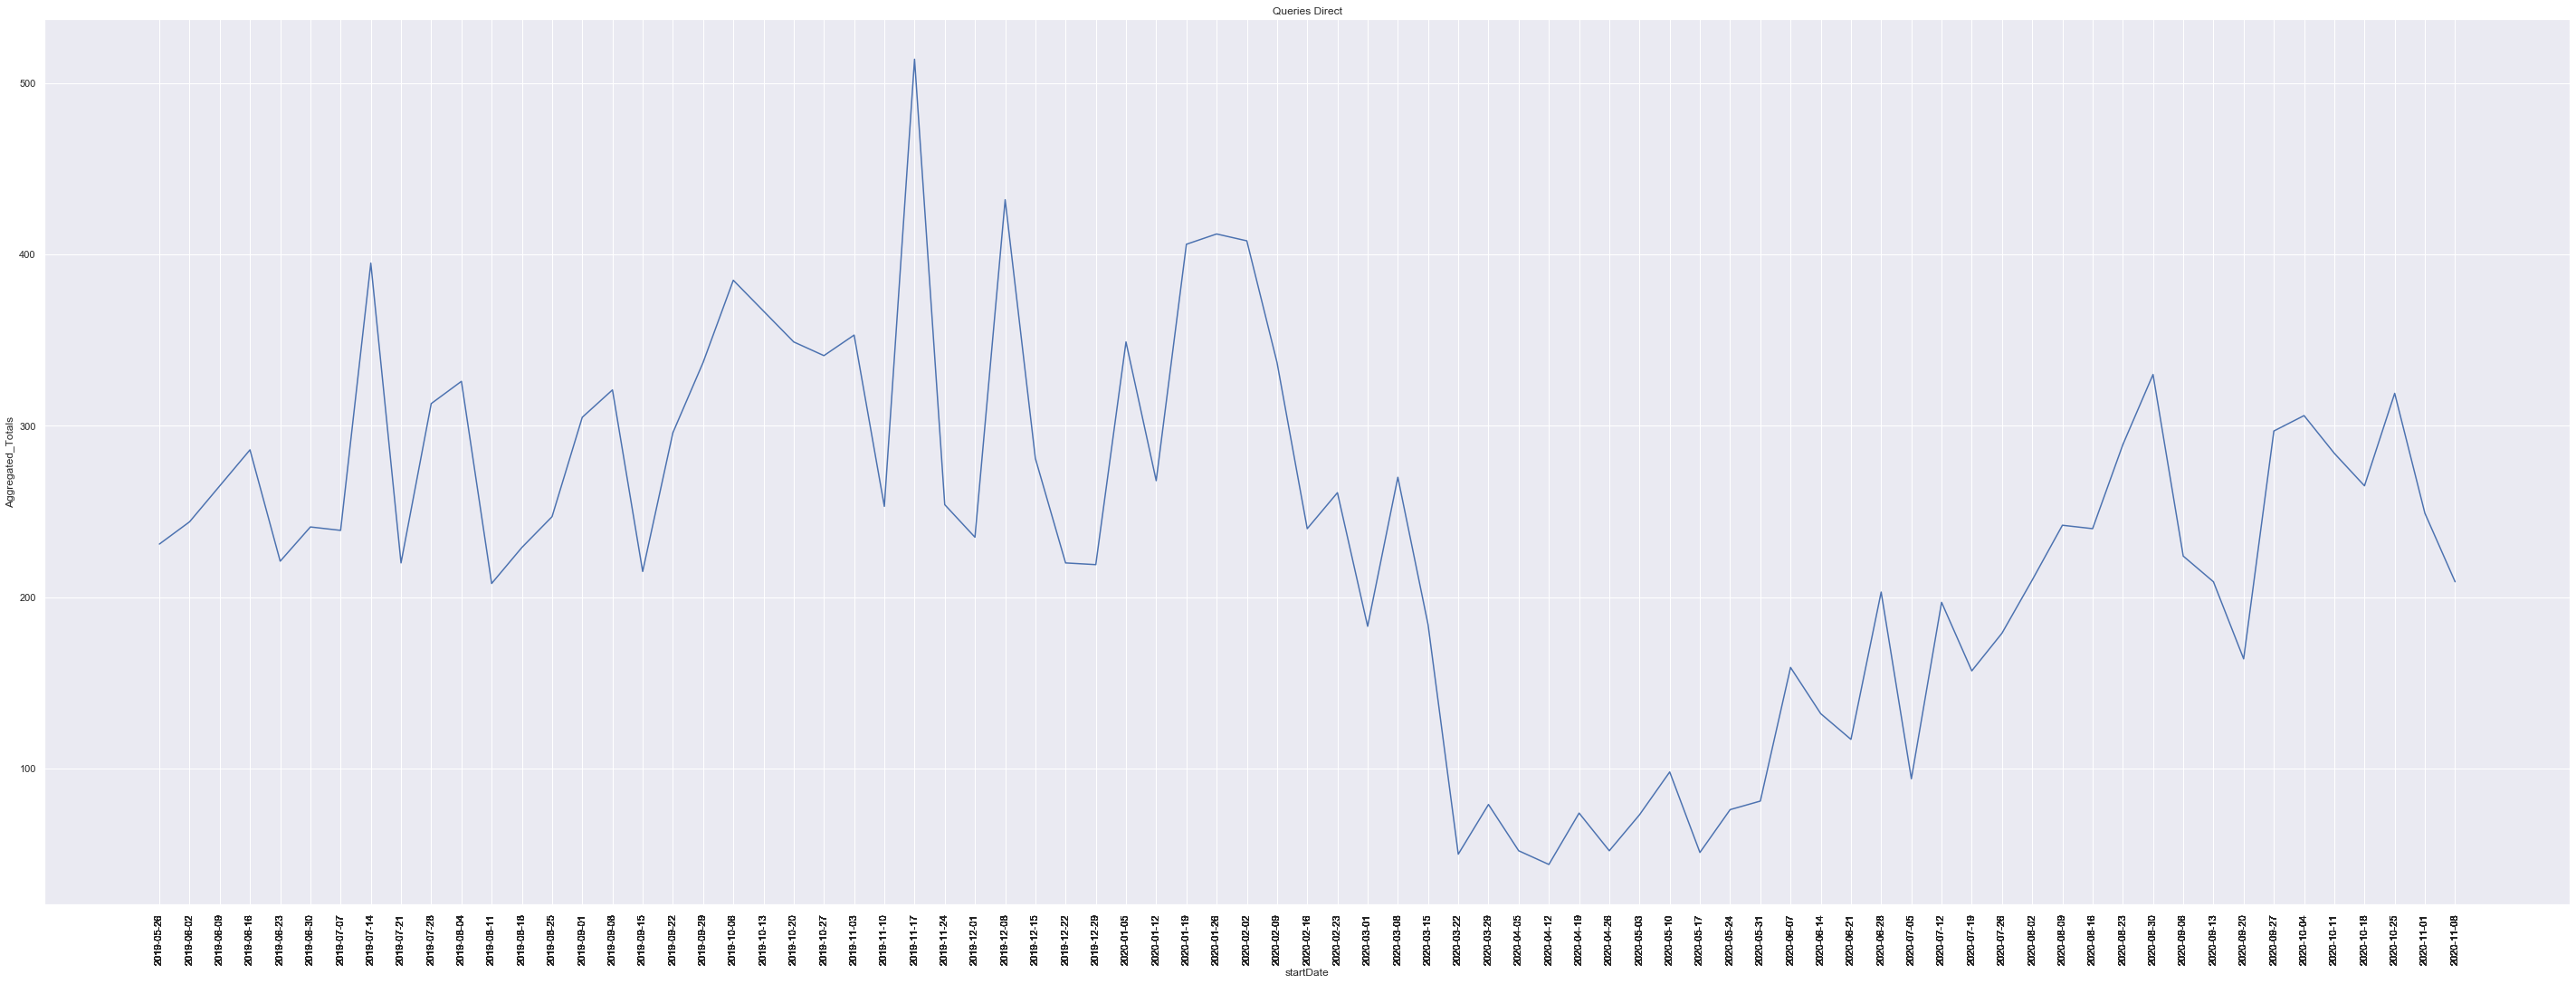

In [70]:
sns.set(rc={'figure.figsize':(50,18)})
g = sns.lineplot(data=df_q_direct, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Queries Direct')

Text(0.5, 1.0, 'Queries InDirect')

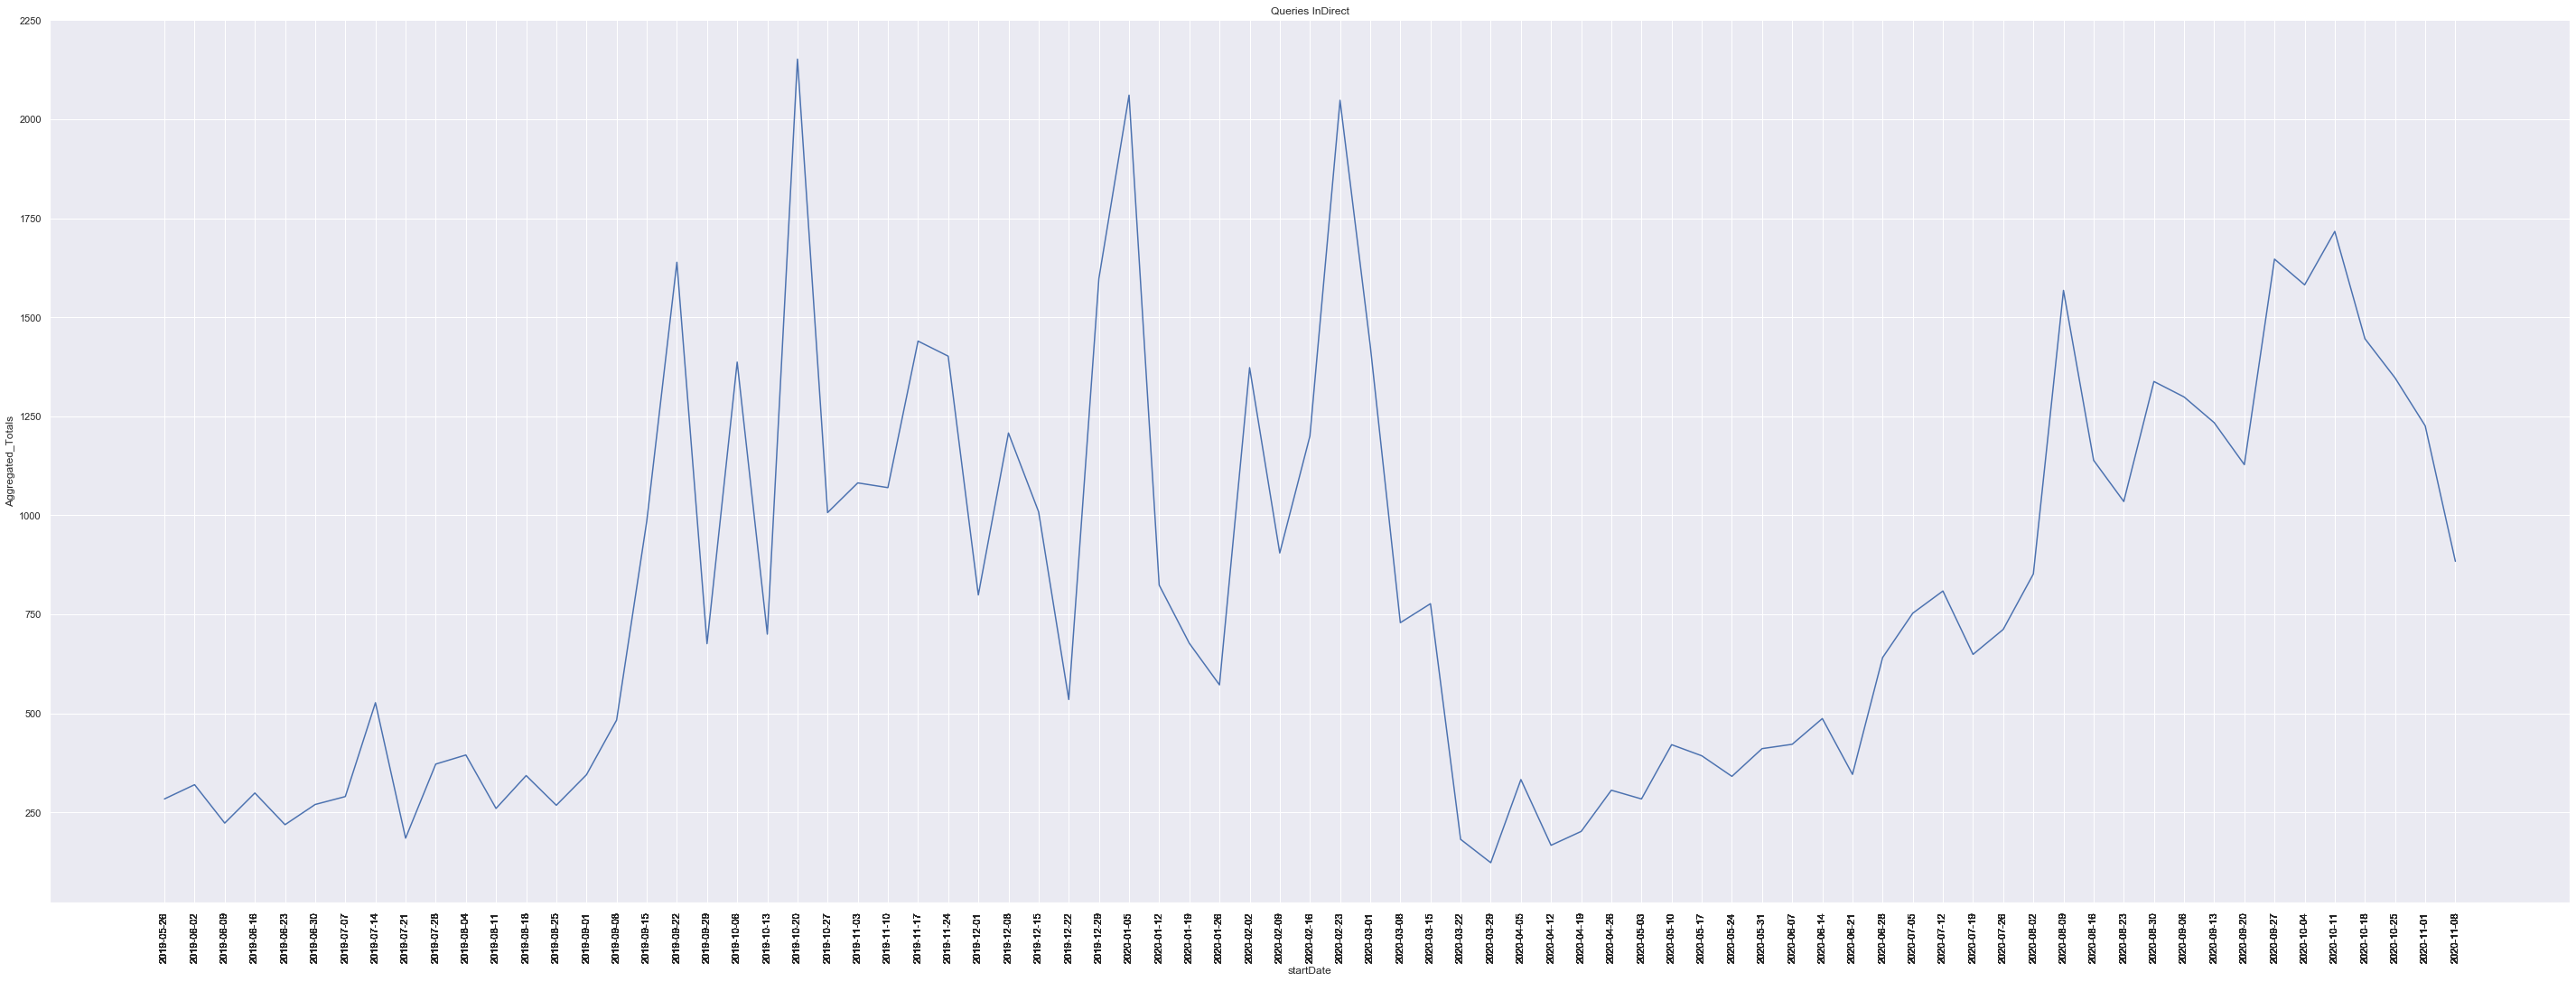

In [71]:
g = sns.lineplot(data=df_q_indirect, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Queries InDirect')

Text(0.5, 1.0, 'Views Maps')

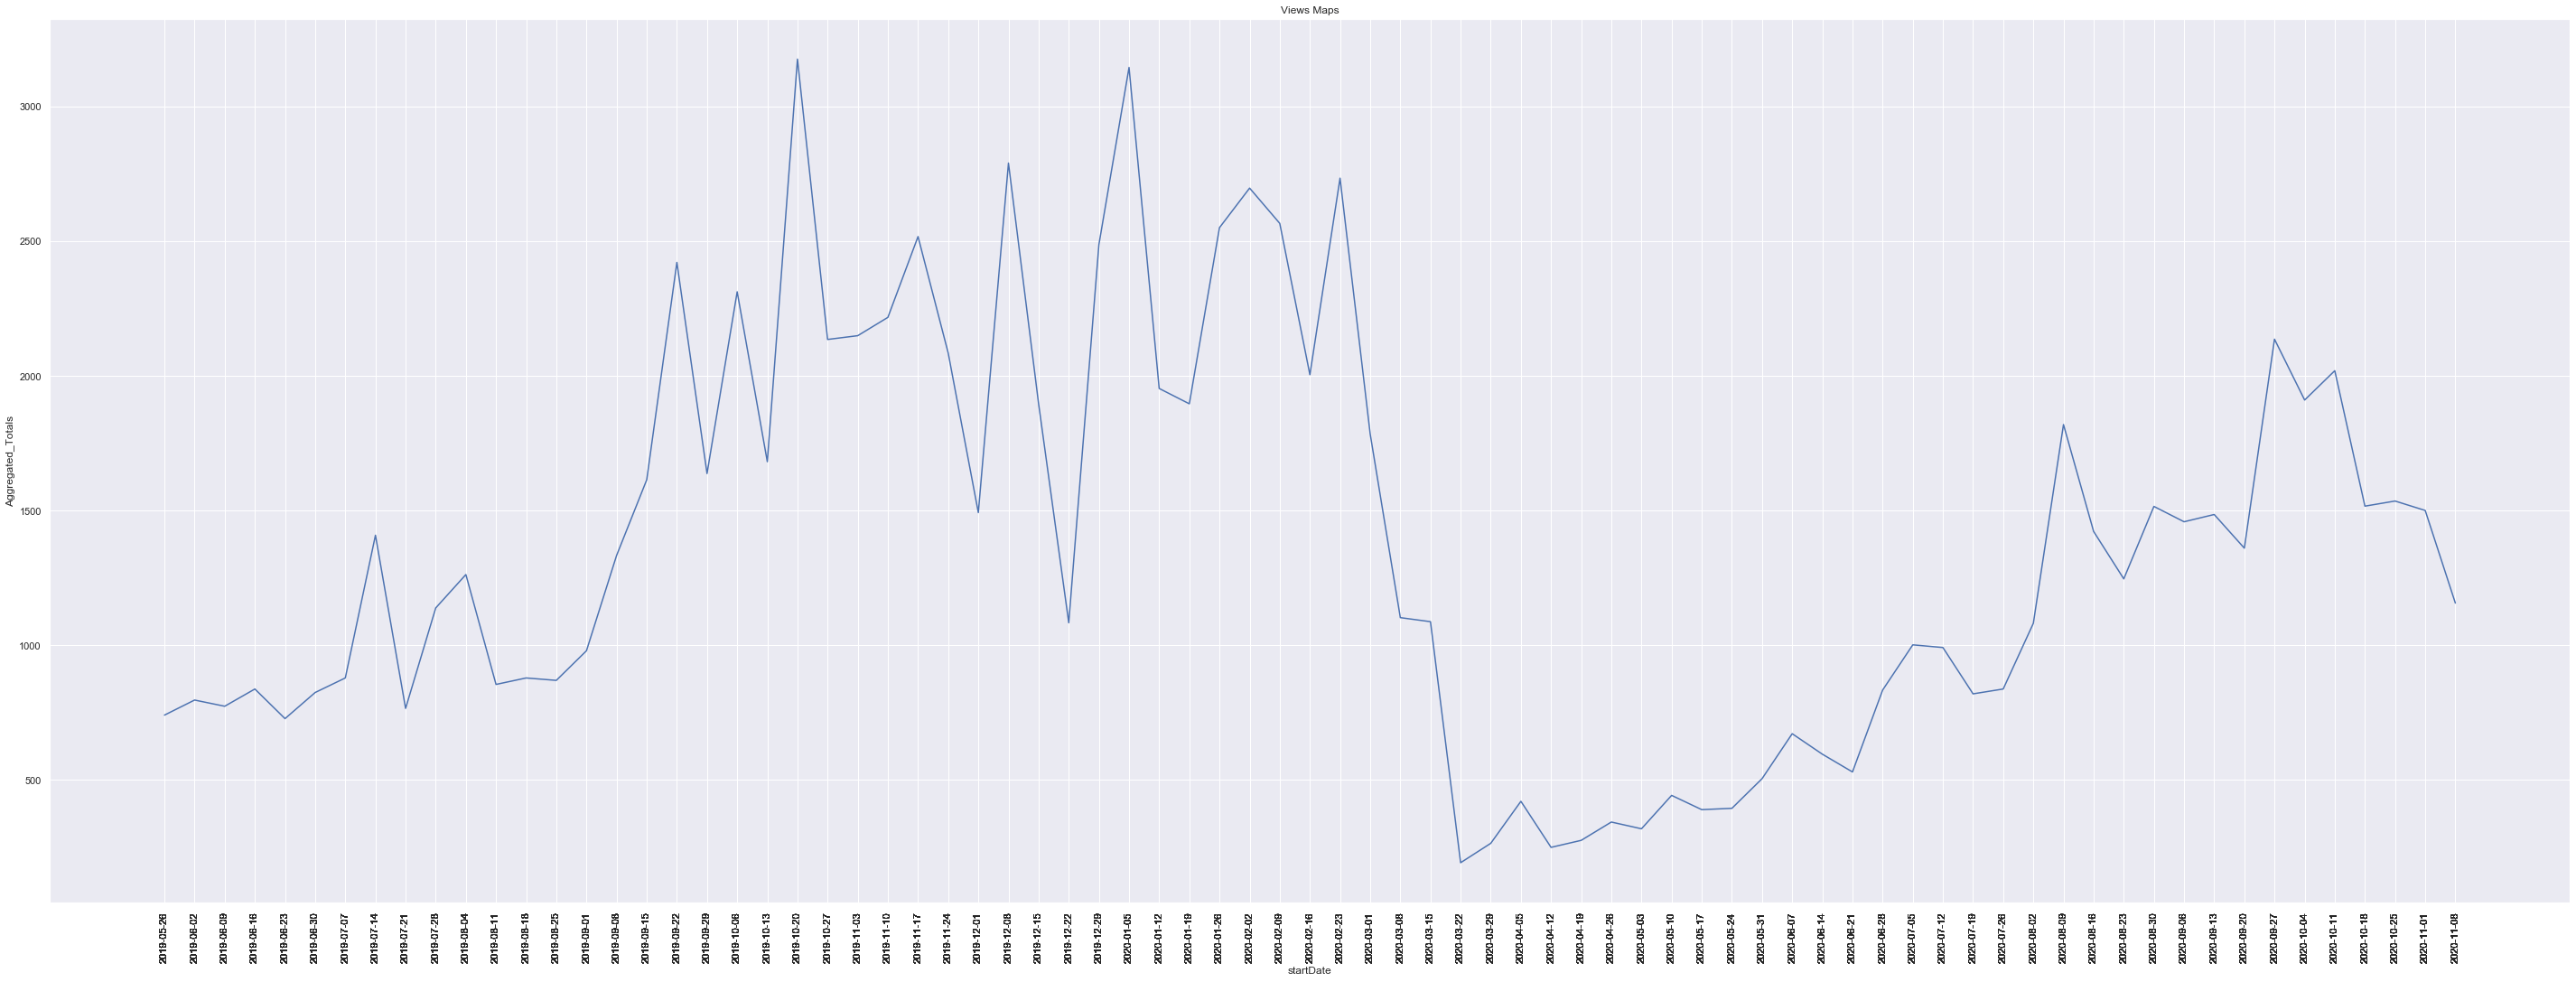

In [72]:
sns.set(rc={'figure.figsize':(50,18)})
g = sns.lineplot(data=df_views_maps, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Views Maps')

Text(0.5, 1.0, 'Views Google Search')

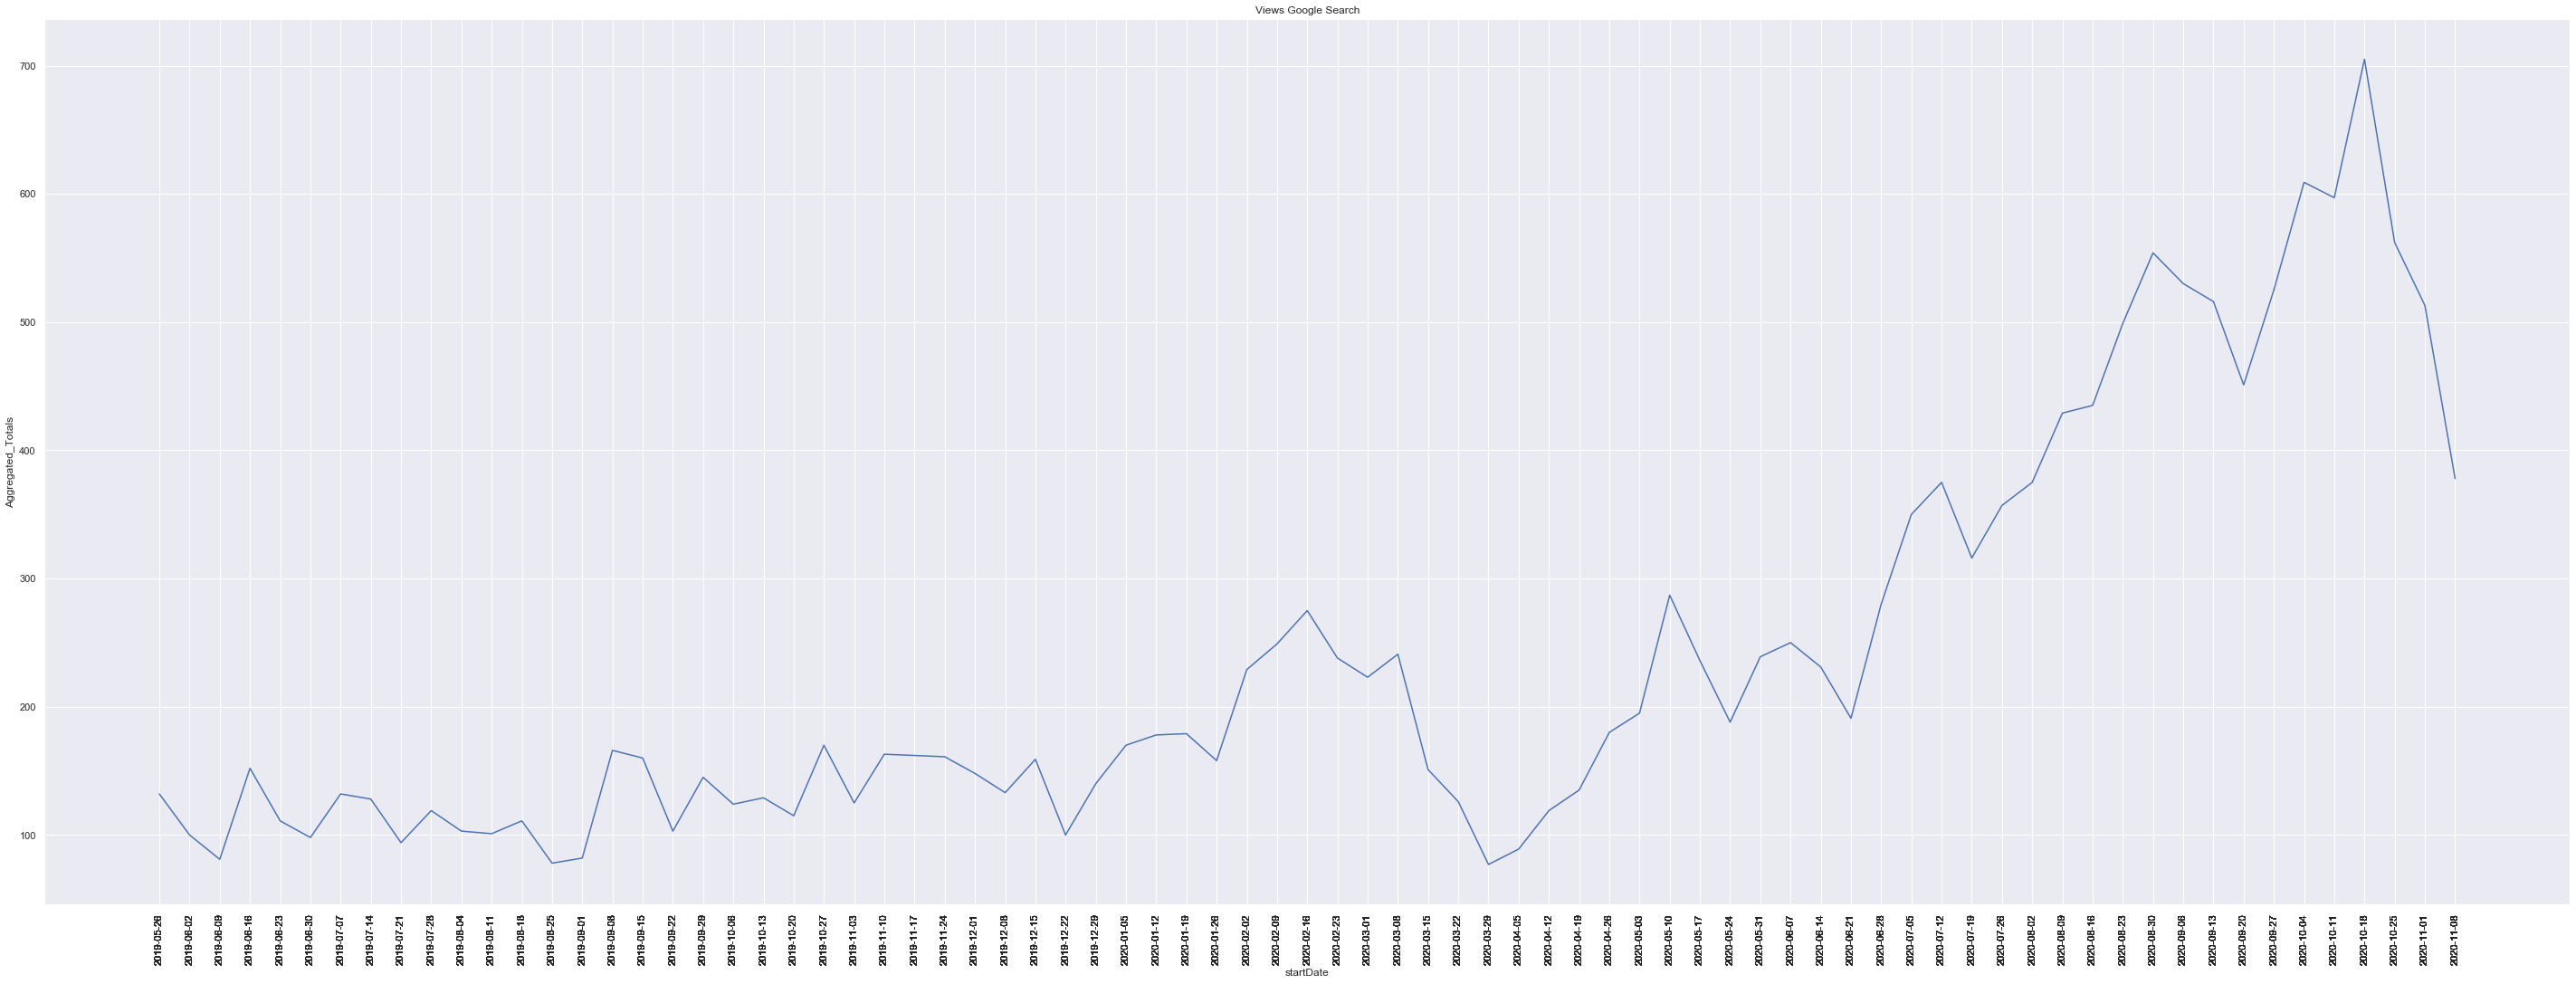

In [73]:
sns.set(rc={'figure.figsize':(50,18)})
g = sns.lineplot(data=df_views_search, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Views Google Search')

Text(0.5, 1.0, 'Clicks on the Website')

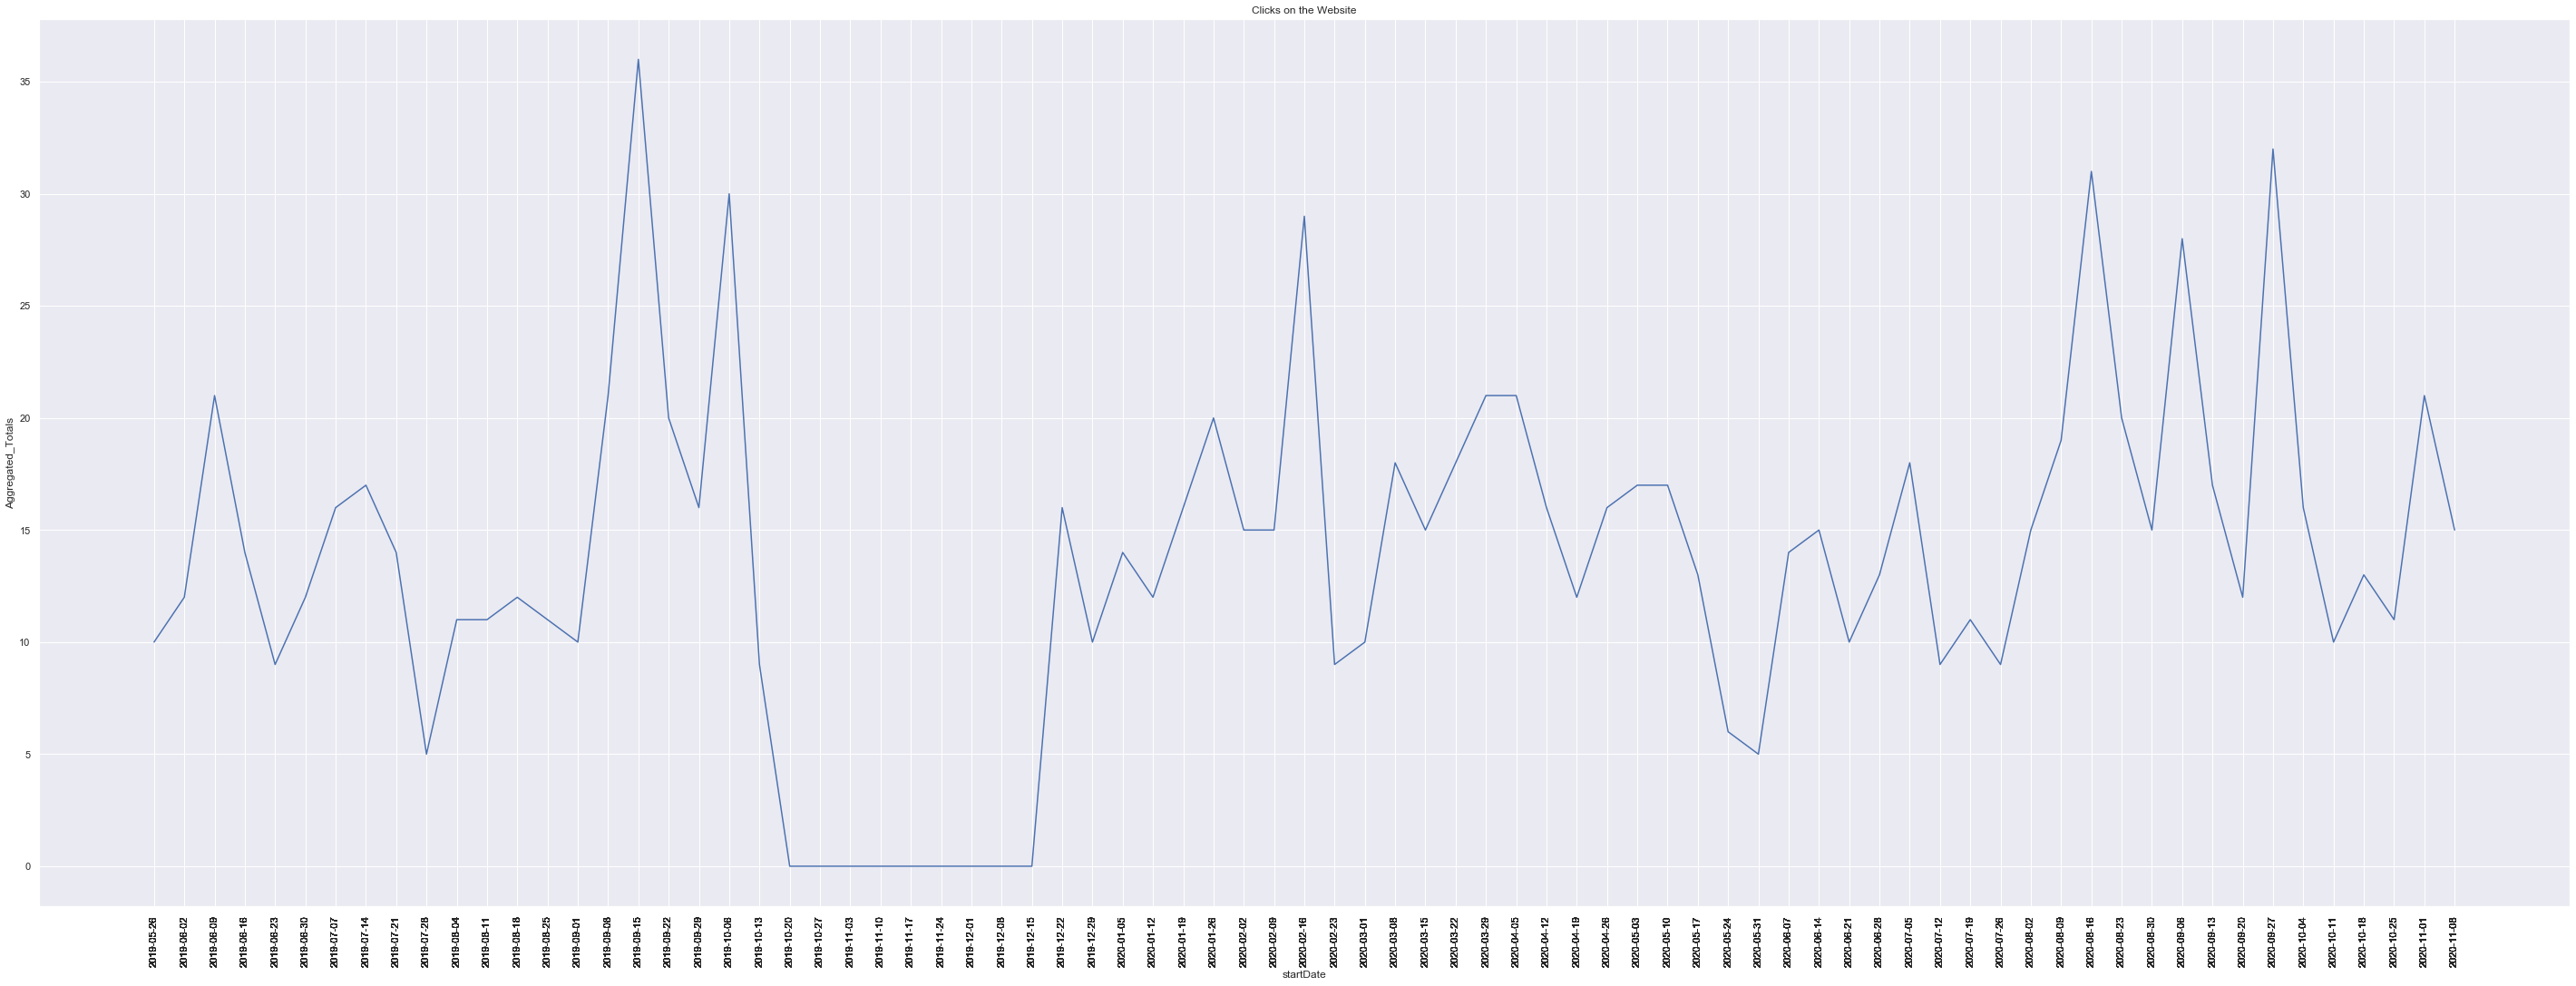

In [74]:
sns.set(rc={'figure.figsize':(50,18)})
g = sns.lineplot(data=df_actions_website, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Clicks on the Website')

Text(0.5, 1.0, 'Asked for Driving Directions')

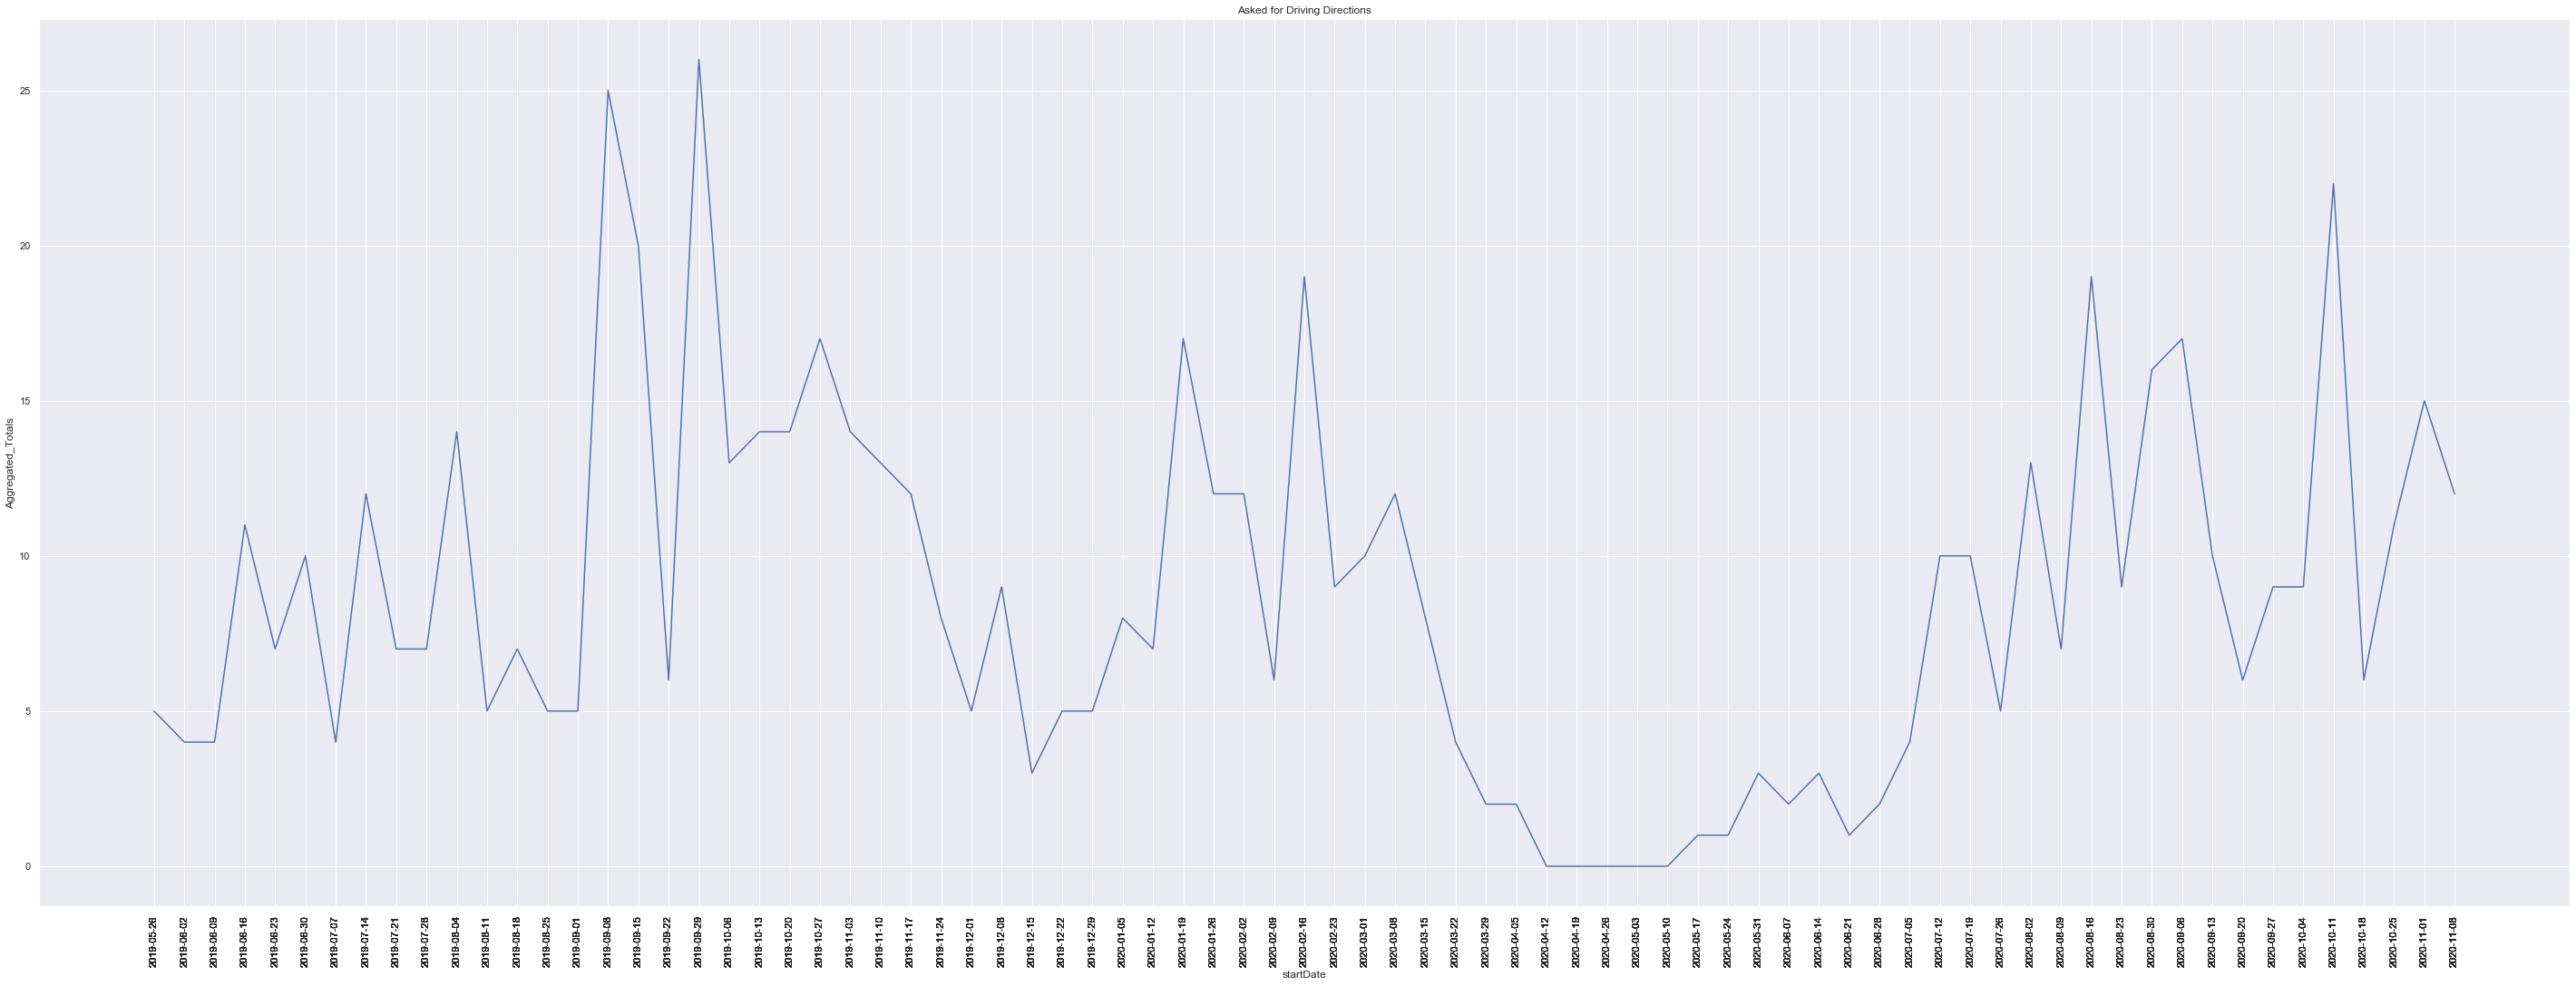

In [75]:
sns.set(rc={'figure.figsize':(50,18)})
g = sns.lineplot(data=df_driving_directions, x="startDate", y="Aggregated_Totals")
g.set_xticks(df_weeks.startDate);
plt.xticks(rotation = 90)
plt.title('Asked for Driving Directions')

Monthly Series Visualisations: